In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.signal import hilbert
from audio_function import filt_freq, RMS

In [75]:
def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    #ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона


In [76]:
fs, data_0605_91_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0091S2.wav')
fs, data_0605_92_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0092S2.wav')
fs, data_0605_93_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0093S2.wav')
fs, data_0605_94_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0094S2.wav')
fs, data_0605_95_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0095S2.wav')
fs, data_0605_96_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0096S2.wav')
fs, data_0605_97_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0097S2.wav')
fs, data_0605_98_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0098S2.wav')
fs, data_0605_99_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0099S2.wav')
fs, data_0605_100_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0100S2.wav')
fs, data_0605_101_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0101S2.wav')
fs, data_0605_102_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0102S2.wav')
fs, data_0605_103_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/0605_pgd/TASCAM_0103S2.wav')

data_0605_2 = [data_0605_91_2, data_0605_92_2, data_0605_93_2, data_0605_94_2, data_0605_95_2, data_0605_96_2, data_0605_97_2, data_0605_98_2, data_0605_99_2, data_0605_100_2, data_0605_101_2, data_0605_102_2, data_0605_103_2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


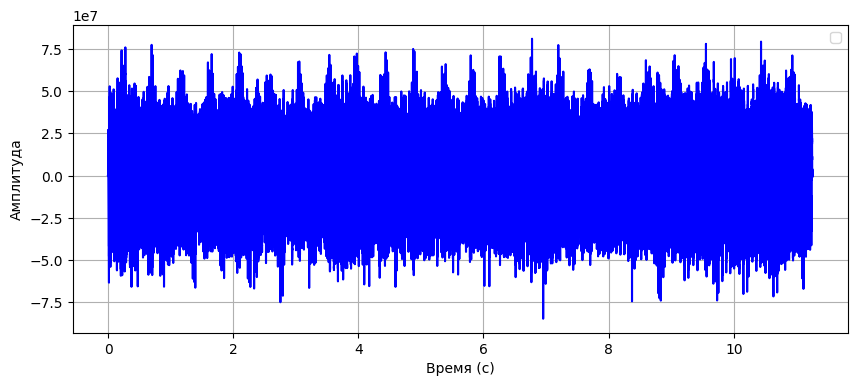

In [77]:
j = 6
t = np.arange(len(data_0605_2[j]))/fs
f = fftfreq(len(data_0605_2[j]), 1 / fs)
plt.figure(figsize=(10,4))
plt.plot(t, data_0605_2[j], color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [79]:
data_rotation = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    
    RMS_degrees = []

    for i in range(len(data_0605_2)):
        data_rotation_filt = ifft(filt_freq(fft(data_0605_2[i]), f1, f2))
        RMS_value = RMS(data_rotation_filt, f1, f2)
        RMS_degrees.append(RMS_value)

    data_rotation.append(RMS_degrees)

print("RMS_array", data_rotation)

# t_index = (t > 25) & (t < 63)
# t_rotation = t[t_index]
# data_rotation = data_0605_104_2[t_index]/max(data_0605_104_2[t_index])
# f_rotation = fftfreq(int(len(data_rotation)), 1 / fs)

# data_rotation_octaves = []
# for f1, f2 in zip(lower_bounds, upper_bounds):
#     data_rotation_filt_f = ifft(filt_freq(fft(data_rotation), f1, f2))
    
#     # Применяем преобразование Гильберта
#     analytic_signal = hilbert(np.real(data_rotation_filt_f))
#     envelope = np.abs(analytic_signal)  # Огибающая

#     data_rotation_octaves.append(envelope)

# data_rotation_octaves = np.array(data_rotation_octaves)

# data_rotation_filt = ifft(filt_freq(fft(data_rotation), 281, 355))

# f_ = fftfreq(int(len(data_rotation_filt )), 1 / fs)

# plt.figure(figsize=(10,4))
# plt.plot(t_rotation, data_rotation, color='blue')
# plt.legend()
# plt.xlabel("Время (с)")
# plt.ylabel("Амплитуда")
# plt.grid(True)
# plt.show()

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]


RMS_array [[320364415.86748546, 250422512.89158407, 260969217.95867696, 219464622.72939327, 224165854.37670082, 207223362.20019564, 226364116.88151136, 250237065.40992776, 219589447.36861265, 249314623.4403721, 251689402.5228689, 240167278.46310595, 225222162.47282428], [388433399.9689625, 463566550.46262014, 358935729.86716574, 236407246.28829357, 265971143.46606916, 285330872.02744806, 261288300.02593976, 331655034.41795, 344056271.3485509, 250130802.43064976, 223505126.6283718, 286419359.2149823, 294530214.36268556], [226519237.20156232, 137894041.33576202, 123646472.61335665, 96087919.94884901, 80378578.83014975, 86294423.8832786, 106193531.73796998, 95714259.80825019, 132506193.24387373, 157857999.64959854, 169647455.9094928, 193147503.3596486, 179286996.58861467], [959665569.450592, 500078488.926057, 568933191.6712579, 333608116.11804044, 629769091.3817801, 349293356.33894426, 463025813.0776823, 451864662.9166111, 264011368.16579157, 414027931.14594424, 457403075.73382974, 537824

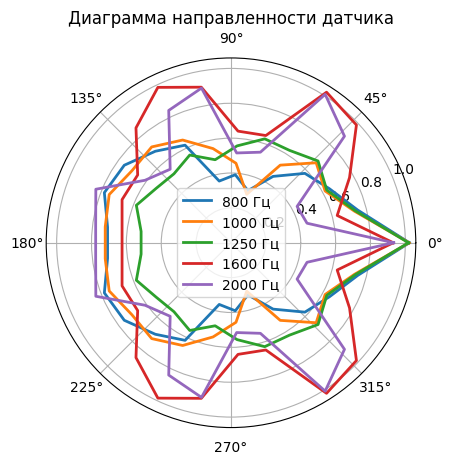

In [ ]:
j = 10
amplitude = []
for i in range(len(data_rotation)):
    original_array = np.array(data_rotation[i])  # Исходный массив
    original_array = original_array/max(original_array)  # Нормируем массив
    reversed_array = original_array[::-1]  # Создаем обратную копию массива
    result_array = np.concatenate((original_array, reversed_array))
    analytic_signal = hilbert(np.real(result_array))
    envelope = np.abs(analytic_signal)  # Огибающая
    amplitude.append(envelope)
    
angles = np.linspace(0, 2 * np.pi, len(amplitude[0]))  # Углы в радианах
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, np.abs(amplitude[10]), linewidth=2, label = "800 Гц")
ax.plot(angles, np.abs(amplitude[11]), linewidth=2, label = "1000 Гц")
ax.plot(angles, np.abs(amplitude[12]), linewidth=2, label = "1250 Гц")
ax.plot(angles, np.abs(amplitude[13]), linewidth=2, label = "1600 Гц")  
ax.plot(angles, np.abs(amplitude[14]), linewidth=2, label = "2000 Гц")
  
ax.set_title("Диаграмма направленности датчика")
plt.legend()
plt.show()

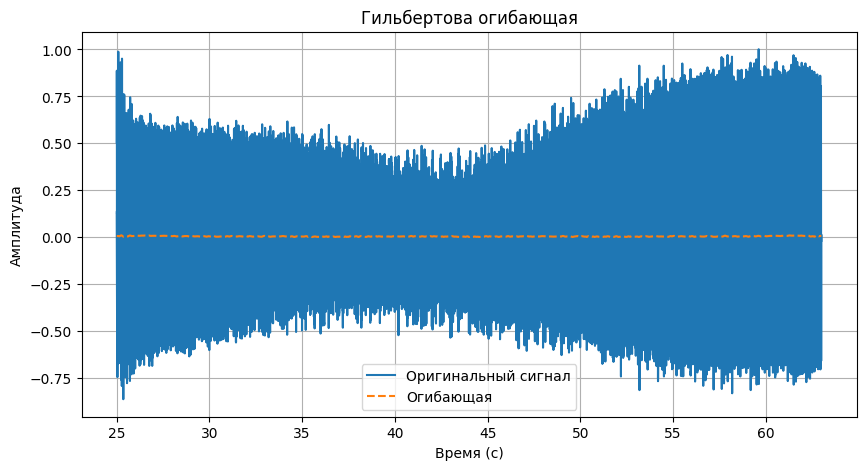

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(t_rotation, data_rotation, label="Оригинальный сигнал")
plt.plot(t_rotation, envelope, label="Огибающая", linestyle="dashed")
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Гильбертовa огибающая")
plt.grid()
plt.show()

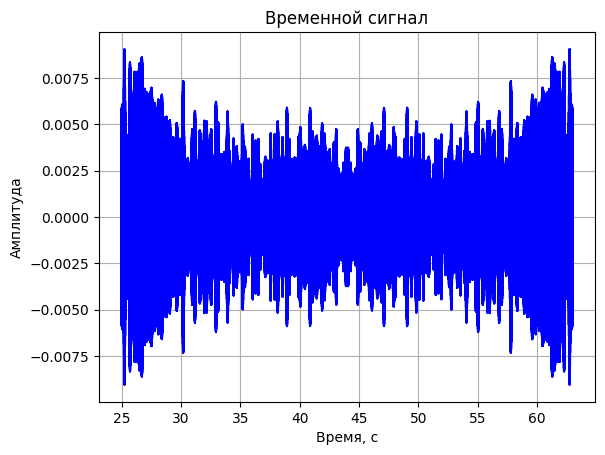

In [17]:
plt.plot(t_rotation, data_rotation_filt, color='blue')
plt.grid(True)

plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Временной сигнал')
plt.show()